In [1]:
import keras
import numpy as np
from tflearn.datasets import cifar10
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#

x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1



In [4]:

#
x_train.shape

#


(50000, 32, 32, 3)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

32

In [7]:
model = Sequential()
#Filters = IMG_width/2 * 7
model.add(Conv2D(112, #alterado de 192 pra 112
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
#calculo da quantidade de filtros da normalização:
# 3*(Width*heigth da saída após a primeira camada de convolução+pooling) / 2
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))


          
#Filters = IMG_width/2 * 9
model.add(Conv2D(144, #alterado de 128 para 144
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
          
          
model.add(Flatten())
#IMG_width^ 2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

#camada anterior/2
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 112)       8512      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 96)          10848     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 144)         345744    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 144)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 96)          13920     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy', #alterado de logcosh
              optimizer=SGD(lr=0.01, momentum=0.01, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
 #                   callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))




Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 46s 914us/step - loss: 2.2873 - acc: 0.1272 - val_loss: 2.2380 - val_acc: 0.1918
Epoch 2/200
50000/50000 [==============================] - 46s 919us/step - loss: 2.1234 - acc: 0.2079 - val_loss: 1.9801 - val_acc: 0.2740
Epoch 3/200
50000/50000 [==============================] - 46s 921us/step - loss: 1.9960 - acc: 0.2574 - val_loss: 1.9173 - val_acc: 0.3042
Epoch 4/200
50000/50000 [==============================] - 46s 921us/step - loss: 1.8894 - acc: 0.3041 - val_loss: 1.9693 - val_acc: 0.3042
Epoch 5/200
50000/50000 [==============================] - 46s 924us/step - loss: 1.7710 - acc: 0.3482 - val_loss: 1.6962 - val_acc: 0.3837
Epoch 6/200
50000/50000 [==============================] - 46s 920us/step - loss: 1.6838 - acc: 0.3796 - val_loss: 1.7176 - val_acc: 0.3858
Epoch 7/200
50000/50000 [==============================] - 46s 916us/step - loss: 1.6149 - acc: 0.4060 - val_l

Epoch 59/200
50000/50000 [==============================] - 46s 916us/step - loss: 0.4599 - acc: 0.8380 - val_loss: 1.0850 - val_acc: 0.6778
Epoch 60/200
50000/50000 [==============================] - 46s 917us/step - loss: 0.4516 - acc: 0.8419 - val_loss: 1.0968 - val_acc: 0.6750
Epoch 61/200
50000/50000 [==============================] - 46s 916us/step - loss: 0.4365 - acc: 0.8455 - val_loss: 1.2561 - val_acc: 0.6589
Epoch 62/200
50000/50000 [==============================] - 46s 916us/step - loss: 0.4212 - acc: 0.8517 - val_loss: 1.4599 - val_acc: 0.6348
Epoch 63/200
50000/50000 [==============================] - 46s 915us/step - loss: 0.4170 - acc: 0.8521 - val_loss: 1.3617 - val_acc: 0.6504
Epoch 64/200
50000/50000 [==============================] - 46s 917us/step - loss: 0.3971 - acc: 0.8588 - val_loss: 1.4801 - val_acc: 0.6394
Epoch 65/200
50000/50000 [==============================] - 46s 920us/step - loss: 0.3898 - acc: 0.8623 - val_loss: 1.1980 - val_acc: 0.6823
Epoch 66/200


Epoch 117/200
50000/50000 [==============================] - 46s 921us/step - loss: 0.0759 - acc: 0.9740 - val_loss: 2.9167 - val_acc: 0.6311
Epoch 118/200
50000/50000 [==============================] - 46s 925us/step - loss: 0.0749 - acc: 0.9756 - val_loss: 2.4591 - val_acc: 0.6637
Epoch 119/200
50000/50000 [==============================] - 46s 923us/step - loss: 0.0757 - acc: 0.9762 - val_loss: 2.4280 - val_acc: 0.6381
Epoch 120/200
50000/50000 [==============================] - 46s 919us/step - loss: 0.0599 - acc: 0.9796 - val_loss: 2.4356 - val_acc: 0.6699
Epoch 121/200
50000/50000 [==============================] - 46s 918us/step - loss: 0.0715 - acc: 0.9762 - val_loss: 2.2635 - val_acc: 0.6786
Epoch 122/200
50000/50000 [==============================] - 46s 922us/step - loss: 0.0646 - acc: 0.9783 - val_loss: 2.3785 - val_acc: 0.6802
Epoch 123/200
50000/50000 [==============================] - 46s 921us/step - loss: 0.0542 - acc: 0.9820 - val_loss: 2.3524 - val_acc: 0.6812
Epoch 

Epoch 175/200
50000/50000 [==============================] - 46s 921us/step - loss: 0.0209 - acc: 0.9936 - val_loss: 2.7570 - val_acc: 0.6812
Epoch 176/200
50000/50000 [==============================] - 46s 920us/step - loss: 0.0175 - acc: 0.9944 - val_loss: 2.7995 - val_acc: 0.6778
Epoch 177/200
50000/50000 [==============================] - 46s 925us/step - loss: 0.0130 - acc: 0.9959 - val_loss: 2.8200 - val_acc: 0.6859
Epoch 178/200
50000/50000 [==============================] - 46s 920us/step - loss: 0.0179 - acc: 0.9941 - val_loss: 2.7944 - val_acc: 0.6736
Epoch 179/200
50000/50000 [==============================] - 46s 923us/step - loss: 0.0230 - acc: 0.9923 - val_loss: 2.8218 - val_acc: 0.6758
Epoch 180/200
50000/50000 [==============================] - 46s 926us/step - loss: 0.0203 - acc: 0.9936 - val_loss: 2.7890 - val_acc: 0.6808
Epoch 181/200
50000/50000 [==============================] - 46s 921us/step - loss: 0.0293 - acc: 0.9910 - val_loss: 2.6921 - val_acc: 0.6859
Epoch 

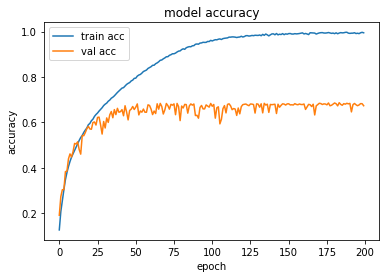

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

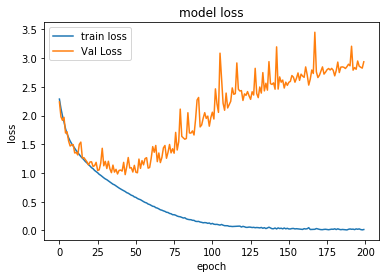

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.93688156624
Test accuracy: 0.6738


In [14]:
print(history.history)

{'val_loss': [2.2380441894531251, 1.9801278224945069, 1.9172697967529297, 1.9692719022750855, 1.6961905002593993, 1.7176288276672362, 1.5572816375732421, 1.4703584720611573, 1.4904657051086425, 1.4944583818435668, 1.3491689235687256, 1.3588013313293457, 1.3151653068542482, 1.4994898393630982, 1.5386286224365235, 1.2627876075744628, 1.2682984818458558, 1.2318871974945069, 1.1949210788726807, 1.1426086994171143, 1.1933078330993652, 1.1952382474899292, 1.1146025148391723, 1.1285050867080688, 1.1863272258758546, 1.04504318857193, 1.0553323937416077, 1.1726043385505676, 1.4309740541458129, 1.1260494921684265, 1.2032621061325073, 1.0785433633804322, 1.2050541034698485, 1.074143016052246, 1.0068146800994873, 1.1378113906860352, 1.0162292104721069, 1.0644844392776489, 0.98347990932464602, 1.0458018688201904, 1.0523478752136231, 1.0339043272018433, 1.1859009876251221, 0.97247734413146969, 1.1082931848526001, 1.2701219657897949, 1.0870559194564819, 1.0933790306091309, 1.0179651851654052, 1.13347

In [16]:

data = pd.DataFrame(history.history)
nome = 'SimpleConvCifar10NormRz_t3' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)